In [1]:
import os
from rasterio.enums import Resampling
from snow_processing import reproject_resample_visualize

# ── Settings ──────────────────────────────────────────────────────────────
input_base       = r"F:\GeoinformaticsProject\Data\MODIS_SnowMask"
resampled_output = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS"
dst_crs          = "EPSG:32632"
dst_res          = (20, 20)    # 20 m target resolution

os.makedirs(resampled_output, exist_ok=True)

# ── Reproject & Resample daily MODIS → 20 m EPSG:32632 ─────────────────────
for year in ["2022", "2023"]:
    year_folder = os.path.join(input_base, year)
    if not os.path.isdir(year_folder):
        continue

    for fname in sorted(os.listdir(year_folder)):
        # Only process neve_YYYYMMDD.img
        if not (fname.startswith("neve_") and fname.endswith(".img")):
            continue

        src_path = os.path.join(year_folder, fname)
        base     = os.path.splitext(fname)[0]       # e.g. 'neve_20220103'
        dst_name = f"{base}.tif"                    # e.g. 'neve_20220103.tif'
        dst_path = os.path.join(resampled_output, dst_name)

        # Skip if already done
        if os.path.exists(dst_path):
            print(f"⚡ Skipping existing {dst_name}")
            continue

        # Run reprojection + nearest‐neighbor resampling
        reproject_resample_visualize(
            src_path          = src_path,
            dst_path          = dst_path,
            dst_crs           = dst_crs,
            dst_res           = dst_res,
            resampling_method = Resampling.nearest,
            visualize         = False
        )
        print(f"✅ Resampled {dst_name}")


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20211220.tif
✅ Resampled neve_20211220.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220101.tif
✅ Resampled neve_20220101.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220111.tif
✅ Resampled neve_20220111.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220116.tif
✅ Resampled neve_20220116.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220124.tif
✅ Resampled neve_20220124.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\neve_20220130.tif
✅ Resampled neve_20220130.tif
✅ Resampled and reprojected saved to: F:\GeoinformaticsProject\Data\Processe

In [1]:
import os
from snow_processing import aggregate_weekly

resampled_modis = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS"
weekly_modis   = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS"

print("\n▶️ Aggregating weekly for MODIS")
aggregate_weekly(
    directory     = resampled_modis,
    pattern       = '.tif',      # all binary MODIS .tif files
    output_dir    = weekly_modis,
    method        = 'max',
    threshold     = 0.5,        # keep raw 0/1
    qc_suffix     = '_QC.tif',   # no effect (no QC files)
    skip_existing = True,
    summary       = True,
    parallel      = True,
    max_workers   = 1
)

f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """



▶️ Aggregating weekly for MODIS
📦 Aggregating 1 → 2021_W51 (max)


f:\GeoinformaticsProject\Code\Snow\snow_processing.py:281: RuntimeWarning: All-NaN slice encountered
  result = np.nanmax(arr, axis=0)


📦 Aggregating 1 → 2021_W52 (max)
📦 Aggregating 2 → 2022_W02 (max)
📦 Aggregating 2 → 2022_W04 (max)
📦 Aggregating 1 → 2022_W06 (max)
📦 Aggregating 1 → 2022_W07 (max)
📦 Aggregating 1 → 2022_W08 (max)
📦 Aggregating 1 → 2022_W09 (max)
📦 Aggregating 1 → 2022_W10 (max)
📦 Aggregating 1 → 2022_W11 (max)
📦 Aggregating 2 → 2022_W12 (max)
📦 Aggregating 2 → 2022_W14 (max)
📦 Aggregating 1 → 2022_W16 (max)
📦 Aggregating 1 → 2022_W17 (max)
📦 Aggregating 1 → 2022_W19 (max)
📦 Aggregating 1 → 2022_W43 (max)
📦 Aggregating 1 → 2022_W44 (max)
📦 Aggregating 1 → 2022_W47 (max)
📦 Aggregating 1 → 2022_W49 (max)
📦 Aggregating 2 → 2022_W50 (max)
📦 Aggregating 1 → 2022_W52 (max)
📦 Aggregating 1 → 2023_W02 (max)
📦 Aggregating 1 → 2023_W04 (max)
📦 Aggregating 2 → 2023_W06 (max)
📦 Aggregating 1 → 2023_W08 (max)
📦 Aggregating 1 → 2023_W09 (max)
📦 Aggregating 1 → 2023_W10 (max)
📦 Aggregating 1 → 2023_W11 (max)
📦 Aggregating 1 → 2023_W13 (max)
📦 Aggregating 1 → 2023_W14 (max)
📦 Aggregating 2 → 2023_W15 (max)
📦 Aggregat

['F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2021_W51.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2021_W52.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W02.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W04.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W06.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W07.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W08.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W09.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W10.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W11.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W12.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W14.tif',
 'F:\\GeoinformaticsProject\\Data\\Processed\\WEEKLY\\MODIS\\2022_W16.tif',
 'F:\\Geoinf

In [2]:
import rasterio
import numpy as np
arr = rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2022_W07.tif").read(1)
print(np.unique(arr))  # should print [0  1  255]

[  0   1 255]


In [ ]:
from snow_processing import resample_reproject_gfsc, aggregate_weekly_gfsc
import rasterio
import numpy as np

# 1) Reproject & binarize daily GFSC
daily_in  = r"F:\GeoinformaticsProject\Data\GFSC\NewGFSC"
daily_out = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC"
resampled = resample_reproject_gfsc(
    input_dir = daily_in,
    output_dir= daily_out,
    threshold = 20.0
)

# check one day’s unique values
with rasterio.open(resampled[0]) as src:
    print("Daily  →", np.unique(src.read(1)))
# should print: [  0   1 255]

# 2) Aggregate to weekly
weekly_in  = daily_out
weekly_out = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC"
weekly = aggregate_weekly_gfsc(
    input_dir  = weekly_in,
    output_dir = weekly_out,
    method     = 'max'
)


✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211107.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211114.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211121.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211128.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211205.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211212.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211219.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211226.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20220102.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20220109.tif
✅ Daily GFSC → F:\GeoinformaticsProject\Data\Proce

f:\GeoinformaticsProject\Code\Snow\snow_processing.py:512: RuntimeWarning: All-NaN slice encountered
  res = np.nanmax(arr3d, axis=0)


✔️ Weekly: processed=51, skipped=0, outputs=51


In [1]:
import os
from snow_processing import process_all_biweekly

input_root = r"F:\GeoinformaticsProject\Data\S2\S2\SnowMask"
output_dir = r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2"

process_all_biweekly(input_root, output_dir)

f:\GeoinformaticsProject\Code\Snow\snow_processing.py:47: SyntaxWarning: invalid escape sequence '\M'
  """


Found 31 biweekly SnowMask files.
[1/31] 20220103_20220116_SnowMask_latest.tif
[2/31] 20220117_20220130_SnowMask_latest.tif
[3/31] 20220131_20220213_SnowMask_latest.tif
[4/31] 20220214_20220227_SnowMask_latest.tif
[5/31] 20220228_20220313_SnowMask_latest.tif
[6/31] 20220314_20220327_SnowMask_latest.tif
[7/31] 20220328_20220410_SnowMask_latest.tif
[8/31] 20220411_20220424_SnowMask_latest.tif
[9/31] 20221003_20221016_SnowMask_latest.tif
[10/31] 20221017_20221030_SnowMask_latest.tif
[11/31] 20221031_20221113_SnowMask_latest.tif
[12/31] 20221114_20221127_SnowMask_latest.tif
[13/31] 20221128_20221211_SnowMask_latest.tif
[14/31] 20221205_20221218_SnowMask_latest.tif
[15/31] 20221212_20221225_SnowMask_latest.tif
[16/31] 20221226_20230110_SnowMask_latest.tif
[17/31] 20230109_20230122_SnowMask_latest.tif
[18/31] 20230116_20230129_SnowMask_latest.tif
[19/31] 20230123_20230205_SnowMask_latest.tif
[20/31] 20230130_20230212_SnowMask_latest.tif
[21/31] 20230206_20230219_SnowMask_latest.tif
[22/31] 2

In [ ]:
from snow_processing import reproject_s3_weekly

s3_input  = r"F:\GeoinformaticsProject\Data\S3\S3\SnowMask"
s3_output = r"F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3"

weeks_s3 = reproject_s3_weekly(
    input_dir  = s3_input,
    output_dir = s3_output,
    dst_crs    = 'EPSG:32632',
)
print(f"Produced {len(weeks_s3)} S3 weekly files: {wee
    dst_res    = (20, 20)ks_s3}")


✅ S3 week 2022_W01 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W01.tif
✅ S3 week 2022_W01 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W01.tif
✅ S3 week 2022_W02 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W02.tif
✅ S3 week 2022_W02 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W02.tif
✅ S3 week 2022_W03 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W03.tif
✅ S3 week 2022_W03 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W03.tif
✅ S3 week 2022_W04 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W04.tif
✅ S3 week 2022_W04 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W04.tif
✅ S3 week 2022_W05 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W05.tif
✅ S3 week 2022_W05 → F:/GeoinformaticsProject/Data/Processed/RESAMPLED-REPROJECTED/S3\2022_W05.tif
✅ S3 week 

In [2]:
from snow_processing import check_all_products_side_by_side
import pandas as pd

# 1) Point at your weekly‐folder locations:
product_folders = [
    ("MODIS", r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS", False),
    ("GFSC",  r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC",  False),   
    ("S2",    r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2",    False),
    ("S3",    r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3",    False),
]

# 2) Build the presence/absence table
df = check_all_products_side_by_side(product_folders,
                                     start_year=2021,
                                     end_year=2023)

# 3) Display it if you like
pd.set_option("display.max_rows", None)
display(df)

# 4) Pull out the list of weeks where ALL products are present
common_weeks = df.loc[df.Common_Week == "✅", "Week"].tolist()
print("Common weeks:", common_weeks)


🔍 Scanning MODIS → F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS
   ➤ Found 33 unique weeks
🔍 Scanning GFSC → F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC
   ➤ Found 51 unique weeks
🔍 Scanning S2 → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2
   ➤ Found 47 unique weeks
🔍 Scanning S3 → F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3
   ➤ Found 40 unique weeks


,Week,MODIS,GFSC,S2,S3,Common_Week
0,2021_W01,❌,❌,❌,❌,
1,2021_W02,❌,❌,❌,❌,
2,2021_W03,❌,❌,❌,❌,
3,2021_W04,❌,❌,❌,❌,
4,2021_W05,❌,❌,❌,❌,
5,2021_W06,❌,❌,❌,❌,
6,2021_W07,❌,❌,❌,❌,
7,2021_W08,❌,❌,❌,❌,
8,2021_W09,❌,❌,❌,❌,
9,2021_W10,❌,❌,❌,❌,


Common weeks: ['2022_W02', '2022_W04', '2022_W06', '2022_W07', '2022_W08', '2022_W09', '2022_W10', '2022_W11', '2022_W12', '2022_W44', '2022_W47', '2022_W49', '2022_W50', '2023_W04', '2023_W06', '2023_W08', '2023_W09', '2023_W10', '2023_W11', '2023_W13', '2023_W14', '2023_W15', '2023_W17']


In [4]:
import os
from snow_processing import match_raster_grid
from rasterio.enums import Resampling

# 1) Your reference (MODIS) weekly directory
modis_dir = r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS"

# 2) Source folders for the other products
src_dirs = {
    "GFSC": r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC",
    "S2"  : r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2",
    "S3"  : r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3",
}

# 3) Where the aligned outputs will go
aligned_base = r"F:\GeoinformaticsProject\Data\Processed\ALIGNED"
aligned_dirs = {prod: os.path.join(aligned_base, prod) for prod in src_dirs}
for d in aligned_dirs.values():
    os.makedirs(d, exist_ok=True)

# 4) Your explicitly defined common weeks
common_weeks = [
    '2022_W02','2022_W04','2022_W06','2022_W07','2022_W08',
    '2022_W09','2022_W10','2022_W11','2022_W12','2022_W44',
    '2022_W47','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08','2023_W09','2023_W10',
    '2023_W11','2023_W13','2023_W14','2023_W15','2023_W17',
]

# 5) Loop and match the grids
for prod, src_folder in src_dirs.items():
    dst_folder = aligned_dirs[prod]
    for wk in common_weeks:
        ref_fp = os.path.join(modis_dir,  f"{wk}.tif")
        tgt_fp = os.path.join(src_folder, f"{wk}.tif")
        out_fp = os.path.join(dst_folder, f"{wk}.tif")

        if not os.path.exists(ref_fp):
            print(f"⚠️  Missing MODIS {wk}, skipping {prod}")
            continue
        if not os.path.exists(tgt_fp):
            print(f"⚠️  Missing {prod} {wk}, skipping")
            continue

        match_raster_grid(
            reference_path    = ref_fp,
            target_path       = tgt_fp,
            output_path       = out_fp,
            resampling_method = Resampling.nearest
        )
        print(f"✅ Aligned {prod} {wk} → {out_fp}")


✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W02.tif
✅ Aligned GFSC 2022_W02 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W02.tif
✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W04.tif
✅ Aligned GFSC 2022_W04 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W04.tif
✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W06.tif
✅ Aligned GFSC 2022_W06 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W06.tif
✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W07.tif
✅ Aligned GFSC 2022_W07 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W07.tif
✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W08.tif
✅ Aligned GFSC 2022_W08 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W08.tif
✅ Reprojected to match: F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W09.tif


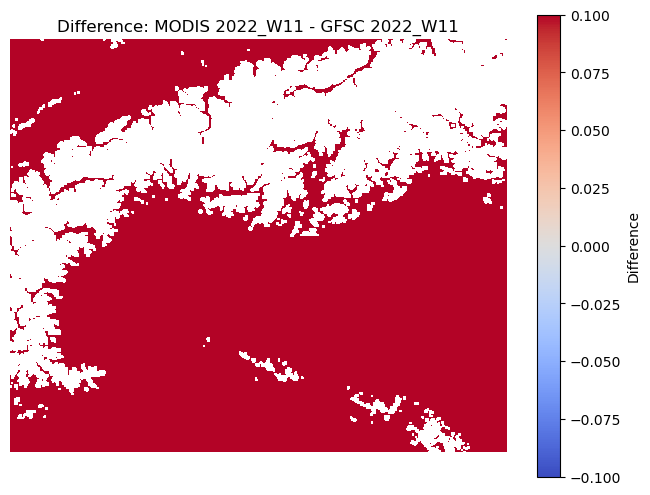

In [3]:
from snow_processing import visual_compare_rasters

week = "2022_W11"

visual_compare_rasters(
    raster_path1=r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2022_W11.tif",
    raster_path2=r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W11.tif",
    labels=(f"MODIS {week}", f"GFSC {week}"),
    difference=True,
    downsample=5
)



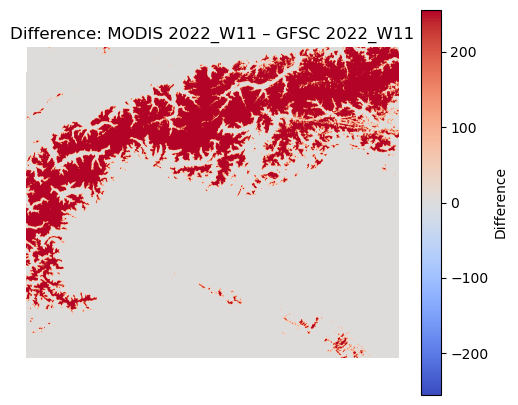

In [4]:
from snow_processing import visual_compare_rasters_strict

week = "2022_W11"
visual_compare_rasters_strict(
    raster_path1=r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2022_W11.tif",
    raster_path2=r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2022_W11.tif",
    labels       = (f"MODIS {week}", f"GFSC {week}"),
    difference   = True,
    downsample   = 5
)


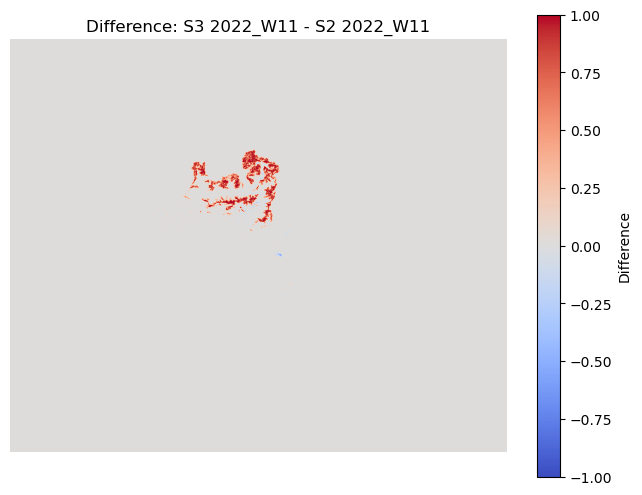

In [5]:
from snow_processing import visual_compare_rasters

week = "2022_W11"

visual_compare_rasters(
    raster_path1=r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3_BINARY\2022_W11.tif",
    raster_path2=r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S2\2022_W11.tif",
    labels=(f"S3 {week}", f"S2 {week}"),
    overlay=True,
    difference=True,
    downsample=5
)


In [6]:
import rasterio, numpy as np
with rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2023_W08.tif") as src:
    arr = src.read(1)
    print(np.unique(arr)[:10])  # first few unique values


[  0   1 255]


In [7]:
import rasterio, numpy as np
with rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2023_W08.tif") as src:
    arr = src.read(1)
    print(np.unique(arr)[:10])  # first few unique values


[0 1]


In [8]:
import rasterio, numpy as np
with rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S2\2023_W08.tif") as src:
    arr = src.read(1)
    print(np.unique(arr)[:10])  # first few unique values


[0 1]


In [9]:
import rasterio, numpy as np
with rasterio.open(r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3_BINARY\2023_W08.tif") as src:
    arr = src.read(1)
    print(np.unique(arr)[:10])  # first few unique values


[0 1]


In [5]:
# ─────────────────────────────────────────────────────────────────────────────
# 1.  QUICK  DIAGNOSTICS  FOR  ONE  WEEK   (works with any two rasters)
# -----------------------------------------------------------------------------
import rasterio
import numpy as np
import pandas as pd

def raster_quick_stats(path):
    """Return nodata value, unique values and counts (clipped to 20 entries)."""
    with rasterio.open(path) as src:
        data = src.read(1)
        nodata = src.nodata
    # count occurrences
    vals, counts = np.unique(data, return_counts=True)
    tbl = pd.DataFrame({"value": vals, "count": counts})
    return nodata, tbl.head(20)

# ➤  provide the paths you just used in visual_compare_rasters_strict
week   = "2023_W08"
modis  = fr"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2023_W08.tif"
gfsc   = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2023_W08.tif"
s2     = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S2\2023_W08.tif"
s3     = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3\2023_W08.tif"

for name, path in [("MODIS", modis), ("GFSC", gfsc), ("S2", s2), ("S3", s3)]:
    nodata, head = raster_quick_stats(path)
    print(f"\n{name}  ─ nodata = {nodata}")
    print(head)

# ─────────────────────────────────────────────────────────────────────────────
# 2.  CHECK  THAT  ALL  DATASETS  OVERLAP  AFTER  ALIGNMENT
# -----------------------------------------------------------------------------
from rasterio.windows import from_bounds

def intersection_bounds(src1, src2):
    minx = max(src1.bounds.left,   src2.bounds.left)
    miny = max(src1.bounds.bottom, src2.bounds.bottom)
    maxx = min(src1.bounds.right,  src2.bounds.right)
    maxy = min(src1.bounds.top,    src2.bounds.top)
    if (minx >= maxx) or (miny >= maxy):
        return None
    return (minx, miny, maxx, maxy)

with rasterio.open(modis) as m, rasterio.open(gfsc) as g:
    inter = intersection_bounds(m, g)
    print("\nMODIS vs GFSC intersection:", inter)
    if inter is not None:
        win = from_bounds(*inter, transform=m.transform)
        print("→ pixel window size (rows, cols):", (win.height, win.width))



MODIS  ─ nodata = 255.0
   value      count
0      0      63960
1      1  751176546

GFSC  ─ nodata = 255.0
   value      count
0      0  750066814
1      1    1173692

S2  ─ nodata = 255.0
   value      count
0      0  746726425
1      1    4514081

S3  ─ nodata = 255.0
   value      count
0      0  744832056
1      1     248850
2      2     298350
3      3    2472525
4      4    1757025
5      5     346950
6      6    1284750

MODIS vs GFSC intersection: (299725.1480286992, 4799686.739310687, 900165.1480286992, 5300146.739310687)
→ pixel window size (rows, cols): (np.float64(25023.0), np.float64(30022.000000000007))


In [3]:
import os
import numpy as np
import rasterio

# 1) Folders
aligned_s3 = r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3"
binary_s3  = r"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3_BINARY"
os.makedirs(binary_s3, exist_ok=True)

# 2) Loop over exactly your common weeks
common_weeks = [
    '2022_W02','2022_W04','2022_W06','2022_W07','2022_W08',
    '2022_W09','2022_W10','2022_W11','2022_W12','2022_W44',
    '2022_W47','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08','2023_W09','2023_W10',
    '2023_W11','2023_W13','2023_W14','2023_W15','2023_W17',
]


for wk in common_weeks:
    in_fp  = os.path.join(aligned_s3, f"{wk}.tif")
    out_fp = os.path.join(binary_s3,  f"{wk}.tif")
    if os.path.exists(out_fp):
        print(f"⚡ Skipping {wk}, binary already exists")
        continue

    with rasterio.open(in_fp) as src:
        meta = src.profile.copy()
        nod  = src.nodata

        # update to uint8
        meta.update(dtype='uint8', count=1)

        with rasterio.open(out_fp, 'w', **meta) as dst:
            # iterate block windows in band 1
            for _, window in src.block_windows(1):
                arr = src.read(1, window=window)

                # binarize in the block
                # keep nodata as-is; all values >=1 become 1; zero stays 0
                bin_block = np.where(arr == nod, nod,
                              (arr >= 1).astype('uint8'))

                dst.write(bin_block, 1, window=window)

    print(f"✅ Binarized S3 week {wk} → {out_fp}")


⚡ Skipping 2022_W02, binary already exists
⚡ Skipping 2022_W04, binary already exists
⚡ Skipping 2022_W06, binary already exists
⚡ Skipping 2022_W07, binary already exists
⚡ Skipping 2022_W08, binary already exists
⚡ Skipping 2022_W09, binary already exists
⚡ Skipping 2022_W10, binary already exists
⚡ Skipping 2022_W11, binary already exists
⚡ Skipping 2022_W12, binary already exists
⚡ Skipping 2022_W44, binary already exists
✅ Binarized S3 week 2022_W47 → F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3_BINARY\2022_W47.tif
⚡ Skipping 2022_W49, binary already exists
⚡ Skipping 2022_W50, binary already exists
⚡ Skipping 2023_W04, binary already exists
⚡ Skipping 2023_W06, binary already exists
⚡ Skipping 2023_W08, binary already exists
⚡ Skipping 2023_W09, binary already exists
⚡ Skipping 2023_W10, binary already exists
⚡ Skipping 2023_W11, binary already exists
⚡ Skipping 2023_W13, binary already exists
⚡ Skipping 2023_W14, binary already exists
⚡ Skipping 2023_W15, binary already ex

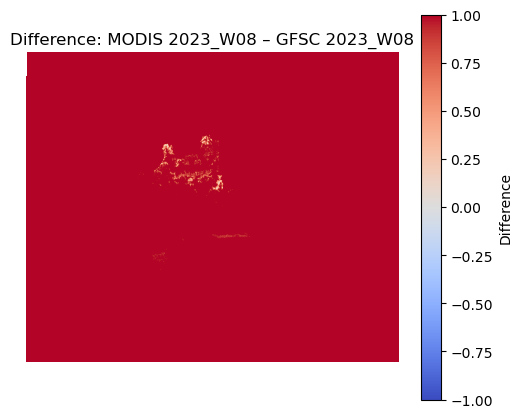

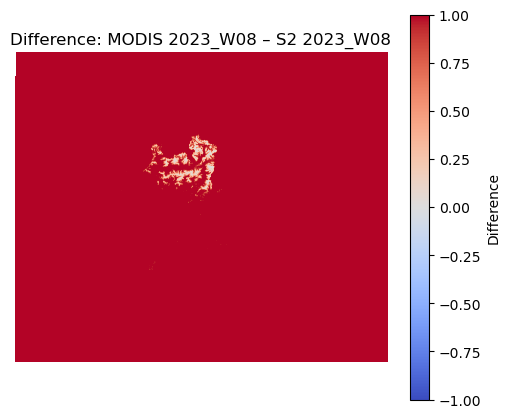

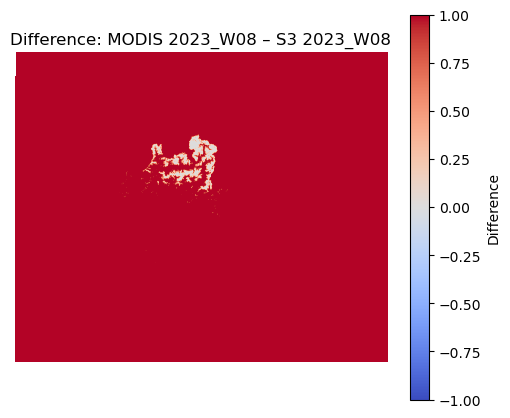

In [1]:
# --- user parameters ---
week     = "2023_W08"
modis    = fr"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS\2023_W08.tif"
gfsc     = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\GFSC\2023_W08.tif"
s2       = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S2\2023_W08.tif"
s3       = fr"F:\GeoinformaticsProject\Data\Processed\ALIGNED\S3_BINARY\2023_W08.tif"

from snow_processing import visual_compare_rasters_strict

# ── MODIS vs GFSC ──────────────────────────────────────────
visual_compare_rasters_strict(
    raster_path1 = modis,
    raster_path2 = gfsc,
    labels       = (f"MODIS {week}", f"GFSC {week}"),
    difference   = True,   # set False for side‑by‑side
    downsample   = 5
)

# ── MODIS vs S2 ────────────────────────────────────────────
visual_compare_rasters_strict(
    raster_path1 = modis,
    raster_path2 = s2,
    labels       = (f"MODIS {week}", f"S2 {week}"),
    difference   = True,
    downsample   = 5
)

# ── MODIS vs S3 ────────────────────────────────────────────
visual_compare_rasters_strict(
    raster_path1 = modis,
    raster_path2 = s3,
    labels       = (f"MODIS {week}", f"S3 {week}"),
    difference   = True,
    downsample   = 5
)
